<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 1 - Part 1: <strong>Multi-Class Classification model</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for FASHION_MNIST dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
    
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

1. Obter um conjunto de validação  
2. Construir o modelo  
3. Compilar a rede  
4. Treinar o modelo – máximo de 50 épocas, de preferência usando callbacks  
5. Gráfico que mostre a evolução do treino  
6. Cálculo dos acertos no conjunto de teste  
7. Mostrar a matriz de confusão  



| Id Classe | Significado    | Id Classe | Significado   |
|-----------|--------------|-----------|--------------|
| 0         | T-shirt/top  | 5         | Sandal       |
| 1         | Trouser      | 6         | Shirt        |
| 2         | Pullover     | 7         | Sneaker      |
| 3         | Dress        | 8         | Bag          |
| 4         | Coat         | 9         | Ankle boot   |

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [1]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

%run ../src/fashionNet.py

IMG_HEIGHT: 28
IMG_WIDTH: 28
N_CLASSES: 10

Número de amostras no training set original: 60000
Número de amostras no test set original: 10000
Não esquecer que se pretende também gerar um validation set!


> ##  a)	Obter um conjunto de validação;

In [3]:
# Criar conjunto de validação (17% dos dados de treino)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.17, random_state=42)

print("Número de amostras no training set:", x_train.shape[0])
print("Número de amostras no validation set:", x_val.shape[0])
print("Número de amostras no test set:", x_test.shape[0])

Número de amostras no training set: 49800
Número de amostras no validation set: 10200
Número de amostras no test set: 10000


> ##  b)	Construir o modelo;

In [4]:
# Criar o modelo
modelo = keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),  # Transformar imagem 28x28 num vetor 1D
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(N_CLASSES, activation='softmax')  # Camada de saída com as 10 classes da label
])

c:\Users\diogo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


> ##  c)	Compilar a rede;

In [5]:
# Compilar o modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> ## d)	Treinar o modelo – max 50 épocas, de pref. a usar callbacks;

In [6]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, min_delta=0.0001, restore_best_weights=True) # Parar o treino se a loss do conjunto de validação não diminuir durante 50 épocas
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.0001) # Reduzir a taxa de aprendizagem se a loss do conjunto de validação não diminuir durante 15 épocas

# Treinar o modelo (máx. 50 épocas, usando callbacks)
history = modelo.fit(x_train, y_train, epochs=50, batch_size=64, 
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7317 - loss: 0.7658 - val_accuracy: 0.8501 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 2/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8453 - loss: 0.4321 - val_accuracy: 0.8630 - val_loss: 0.3812 - learning_rate: 0.0010
Epoch 3/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8617 - loss: 0.3808 - val_accuracy: 0.8627 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8697 - loss: 0.3629 - val_accuracy: 0.8726 - val_loss: 0.3402 - learning_rate: 0.0010
Epoch 5/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.8739 - loss: 0.3387 - val_accuracy: 0.8668 - val_loss: 0.3560 - learning_rate: 0.0010
Epoch 6/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.8795 - loss: 0.3241 - val_accuracy: 0.8812 - val_loss: 0.3275 - learning_rate: 0.0010
Epoch 7/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.8827 - loss: 0

> ## e)	Gráfico que mostre a evolução do treino;

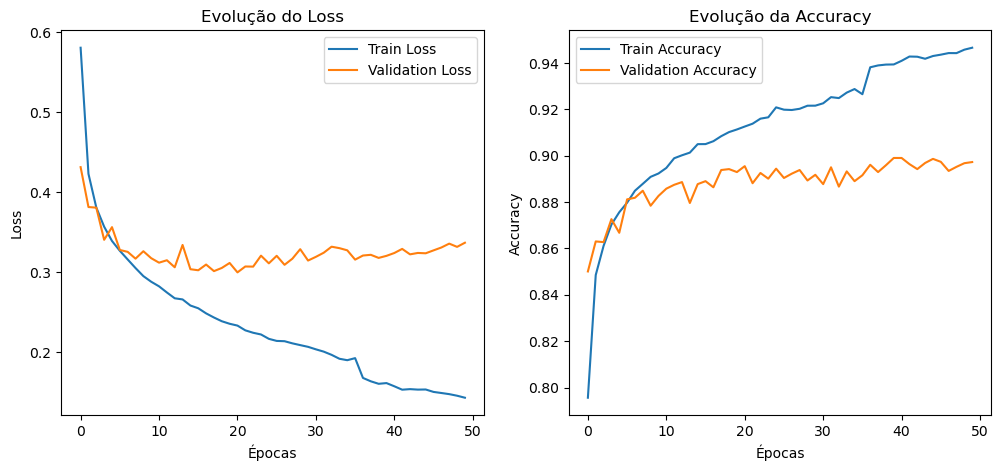

In [7]:
# Gráfico da evolução do treino
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolução do Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Evolução da Accuracy')
plt.show()

> ## f)	Cálculo dos acertos no conjunto de teste;

In [8]:
# Avaliação no conjunto de teste
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=0)
num_acertos = int(test_acc * x_test.shape[0])
print(f'Accuracy no conjunto de teste: {test_acc:.4f}')
print(f'Número absoluto de acertos: {num_acertos}/{x_test.shape[0]}')

Accuracy no conjunto de teste: 0.8891
Número absoluto de acertos: 8891/10000


> ##  g)	Mostrar a matriz de confusão.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


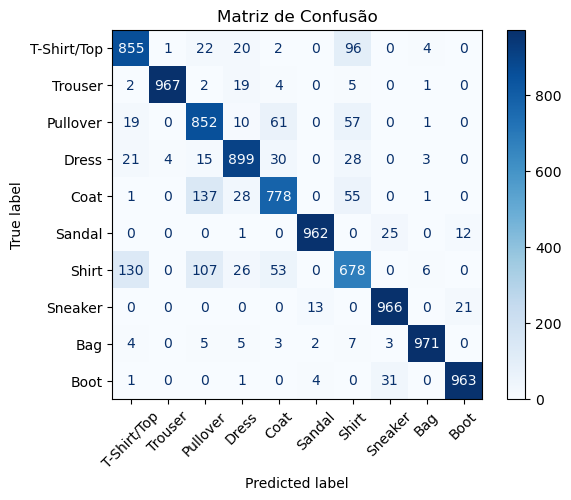

In [10]:
# Predições e matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Matriz de Confusão')
plt.show()

In [11]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS))

Relatório de Classificação:
              precision    recall  f1-score   support

 T-Shirt/Top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.85      0.80      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.84      0.78      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.73      0.68      0.70      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
        Boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

